In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, patheffects
import seaborn as sns

In [2]:
# Define the adminstatas to color into the map.
adminstratas = {"Yemen": ['Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar','Hajjah',
                          'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah', 'Taizz', 'Abyan', 'Aden', 'Al Bayda',
                          "Al Dhale'e"], 
                "Syria": ['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus', "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 
                          'Ar-Raqqa', 'Deir-ez-Zor'], 
                "Burkina Faso": ['Centre', 'Centre-Sud', 'Plateau-Central', 'Centre-Est', 'Est', 'Sahel', 'Boucle-Du-Mouhoun', 
                                 'Centre-Nord', 'Hauts-Bassins', 'Sud-Ouest', 'Cascades', 'Centre-Ouest', 'Nord'], 
                "Nigeria": ['Adamawa', 'Borno', 'Yobe'], 
                "Cameroon": ['South-West', 'Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North', 'West', 'North-West'], 
                "Mali": ['Mopti', 'Segou', 'Tombouctou-Taoudeni', 'Bamako', 'Kayes', 'Koulikoro', 'Sikasso']}

In [3]:
# Load shapefiles of the selected countries.
dfs = []
for country in adminstratas.keys():
    dfs.append(gpd.read_file(f"./shapefiles/adminstratas/{country}/{country}.shp"))

In [4]:
# Define world and countries geopandas dataframe.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries = pd.concat(dfs, sort = False)

# Draw only the selected provinces for each country.
countries["draw"] = countries.apply(lambda x: 1 if x["region"] in adminstratas[x["country"]] else np.nan, axis = 1)
countries.head()

,country,region,geometry,draw
0,Yemen,Ibb,"POLYGON ((44.08076 14.38973, 44.08362 14.37772...",1.0
1,Yemen,Abyan,"POLYGON ((46.29563 14.26991, 46.29770 14.26687...",1.0
2,Yemen,Amanat Al Asimah,"POLYGON ((44.33380 15.60702, 44.35087 15.59940...",1.0
3,Yemen,Al Bayda,"MULTIPOLYGON (((44.72676 14.15240, 44.72637 14...",1.0
4,Yemen,Taizz,"MULTIPOLYGON (((43.41111 12.67158, 43.41124 12...",1.0


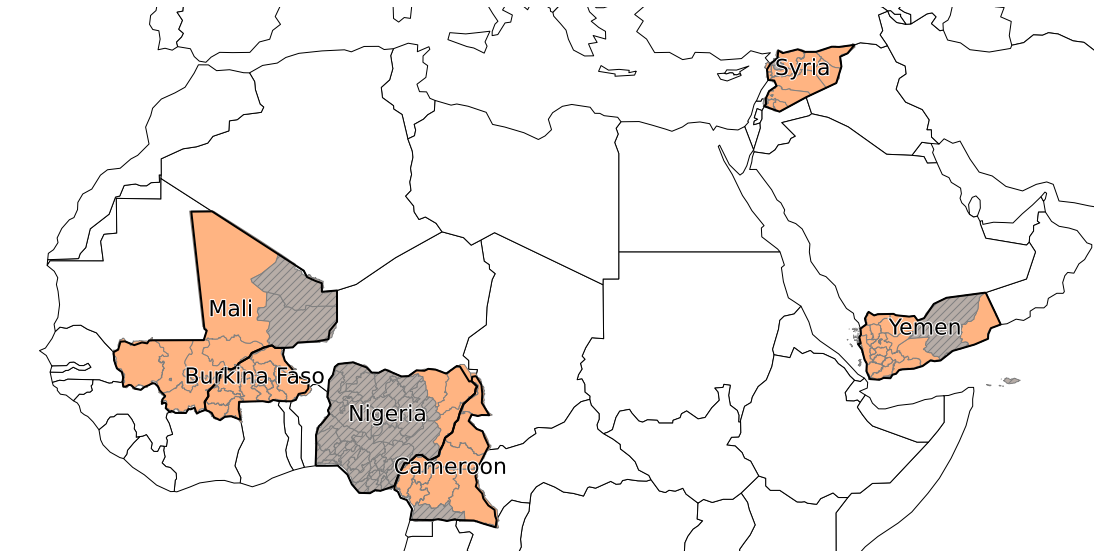

In [5]:
fig, ax = plt.subplots(figsize = (30, 10))

# Create custom cmap.
cmap = colors.ListedColormap([sns.color_palette("pastel")[1]])

world.plot(ax = ax, color = "white", edgecolor = "black")
countries.plot(column = "draw", ax = ax, cmap = cmap, edgecolor = "grey", legend = False, alpha = 1.,
               missing_kwds = {"color": "#b7ada7", "edgecolor": "grey", "hatch": "///", "label": "Missing values"})

boundaries = world[world.name.isin(["Yemen", "Nigeria", "Syria", "Cameroon", "Mali", "Burkina Faso"])]
boundaries.plot(ax = ax, color = "None", edgecolor = "black", linewidth = 2)

for x, y, label in zip(boundaries.centroid.geometry.x, boundaries.centroid.geometry.y, boundaries["name"]):
    ax.text(x, y, label, ha = "center", size = 22, path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])

ax.axis([-20, 60, 0, 40])
ax.set_aspect("equal")
ax.axis("off")

fig.savefig("world.png", dpi = 300, bbox_inches = "tight")

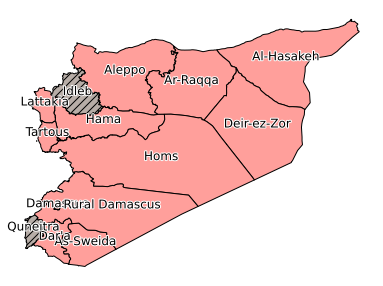

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))

gdf = countries[countries["country"] == "Syria"]

# Create custom cmap.
cmap = colors.ListedColormap([sns.color_palette("pastel")[3]])

gdf.plot(column = "draw", ax = ax, cmap = cmap, edgecolor = "black", legend = False, alpha = 1.,
         missing_kwds = {"color": "#b7ada7", "edgecolor": "black", "hatch": "///", "label": "Missing values"})

for x, y, label in zip(gdf.centroid.geometry.x, gdf.centroid.geometry.y, gdf["region"]):
    ax.text(x, y, label, ha = "center", size = 12, path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])

ax.set_aspect("equal")
ax.axis("off")

fig.savefig("country.png", dpi = 300, bbox_inches = "tight")